<a href="https://colab.research.google.com/github/toraaglobal/CaseStudies/blob/master/regression_and_classification_SustainableLook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sustainability Claim
***
** Tajudeen Abdulazeez **
** toabdula@syr.edu**
** IST718 Big Data Analytics Class Excercise **
***

This is a live session exercise in IST718, to demostrate the analytics workflow in other to complete a data science  case study, and no model optimization is put into consideration for this exercise.
The exercise is aiming to test the student ability to produce a visualization that is useful to answer question relevant to the case study or subject of interest.

* The question is :  Can we predict sustainability claims Using the available data?

![](https://www.prbx.com/wp-content/uploads/2017/02/PRBX-sustainability-1300x550-1300x550.jpg)
***

In [0]:
# Predictive Model for Sustainable Products (Python)

# import packages for analysis and modeling
import pandas as pd  # data frame operations

import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt  # 2D plotting

import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING

%matplotlib inline


In [0]:
# OBTAIN - read in product sales data and create data frame

susitems = pd.read_csv("https://raw.githubusercontent.com/2SUBDA/Breakouts/Week3/Case3SalesProducts.csv", error_bad_lines=False)


#get a subset of the united state from the dataframe
susitemdf = susitems[susitems['Country']=='United States']
susitemdf.head()


,Country,OrderMethod,RetailerType,ProductLine,ProductType,Product,Year,Quarter,SustainableClaim,SustainableMarketing,Revenue,Quantity,GrossMargin
0,United States,Fax,Outdoors Shop,Camping Equipment,Cooking Gear,TrailChef Deluxe Cook Set,2012,Q1 2012,1,0,59628.66,489,0.347548
1,United States,Fax,Outdoors Shop,Camping Equipment,Cooking Gear,TrailChef Double Flame,2012,Q1 2012,0,1,35950.32,252,0.474274
2,United States,Fax,Outdoors Shop,Camping Equipment,Tents,Star Dome,2012,Q1 2012,1,0,89940.48,147,0.352772
3,United States,Fax,Outdoors Shop,Camping Equipment,Tents,Star Gazer 2,2012,Q1 2012,1,0,165883.41,303,0.282938
4,United States,Fax,Outdoors Shop,Camping Equipment,Sleeping Bags,Hibernator Lite,2012,Q1 2012,1,0,119822.20,1415,0.291450


In [0]:
#save the file to a csv locally
susitemdf.to_csv('sustainitems', encoding='utf-8', index=False)

In [0]:
# print the first five rows of the data frame
print(pd.DataFrame.head(susitems))
susitemdf = pd.DataFrame(susitems)



         Country OrderMethod   RetailerType        ProductLine    ProductType  \
0  United States         Fax  Outdoors Shop  Camping Equipment   Cooking Gear   
1  United States         Fax  Outdoors Shop  Camping Equipment   Cooking Gear   
2  United States         Fax  Outdoors Shop  Camping Equipment          Tents   
3  United States         Fax  Outdoors Shop  Camping Equipment          Tents   
4  United States         Fax  Outdoors Shop  Camping Equipment  Sleeping Bags   

                     Product  Year  Quarter  SustainableClaim  \
0  TrailChef Deluxe Cook Set  2012  Q1 2012                 1   
1     TrailChef Double Flame  2012  Q1 2012                 0   
2                  Star Dome  2012  Q1 2012                 1   
3               Star Gazer 2  2012  Q1 2012                 1   
4            Hibernator Lite  2012  Q1 2012                 1   

   SustainableMarketing    Revenue  Quantity  GrossMargin  
0                     0   59628.66       489     0.347548  
1 

In [0]:
#print the nuumerical variables and the categorical variables from the dataframe

numcol = []
catcol = []

for col in susitemdf.columns:
  if susitemdf[col].dtype=='int64' or susitemdf[col].dtype == 'float':
    numcol.append(col)
  else:
    catcol.append(col)
    
    
print("NUmerucal Variables: {}".format(numcol))
print('Categorical Variables: {}'.format(catcol))
  

NUmerucal Variables: ['Year', 'SustainableClaim', 'SustainableMarketing', 'Revenue', 'Quantity', 'GrossMargin']
Categorical Variables: ['Country', 'OrderMethod', 'RetailerType', 'ProductLine', 'ProductType', 'Product', 'Quarter']


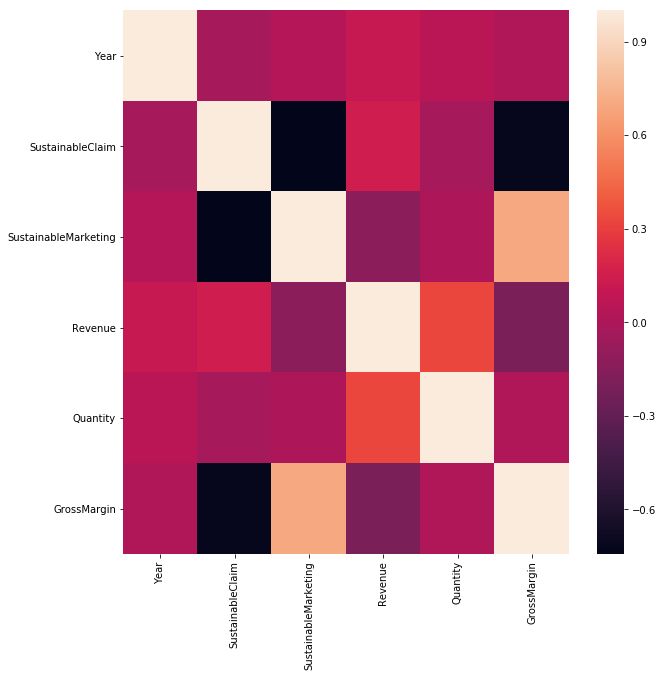

,Year,SustainableClaim,SustainableMarketing,Revenue,Quantity,GrossMargin
Year,1.000000,-0.027465,0.029637,0.111274,0.057137,0.018046
SustainableClaim,-0.027465,1.000000,-0.743214,0.148175,-0.027232,-0.716267
SustainableMarketing,0.029637,-0.743214,1.000000,-0.129433,0.005043,0.694093
Revenue,0.111274,0.148175,-0.129433,1.000000,0.327378,-0.192328
Quantity,0.057137,-0.027232,0.005043,0.327378,1.000000,0.017929
GrossMargin,0.018046,-0.716267,0.694093,-0.192328,0.017929,1.000000


In [0]:
# heatmap correlation matrix of the dataframe
corr = susitemdf.corr()

plt.figure(figsize= (10,10))

sns.heatmap(corr)

plt.show()
corr

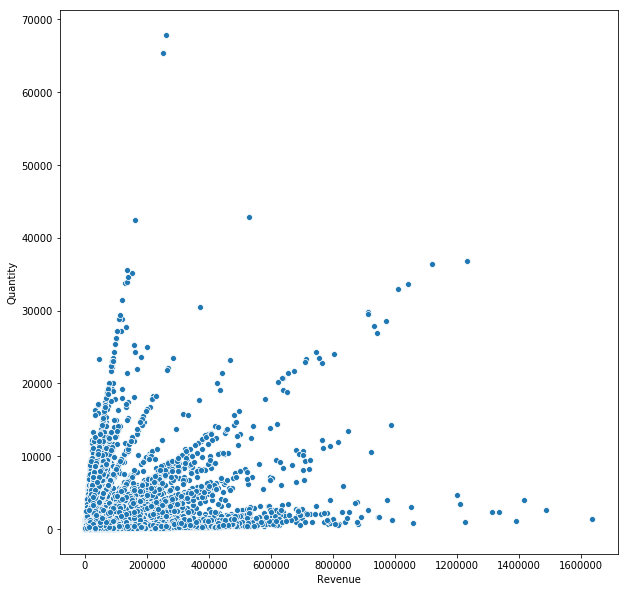

In [0]:
#plot the Revenue vs Quantity to check if there is linear relationship
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'Revenue', y = 'Quantity', data= susitemdf)
plt.show()

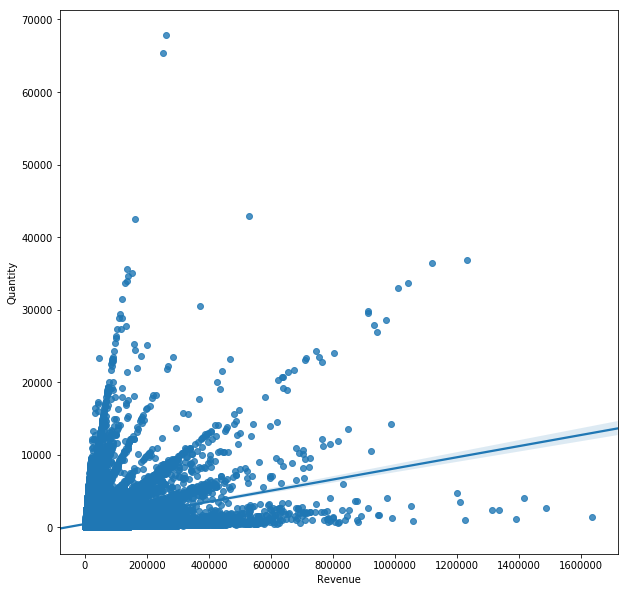

In [0]:
##plot the Revenue vs Quantity to check if there is linear relationship
plt.figure(figsize=(10,10))
sns.regplot(x = 'Revenue', y = 'Quantity', data= susitemdf)
plt.show()


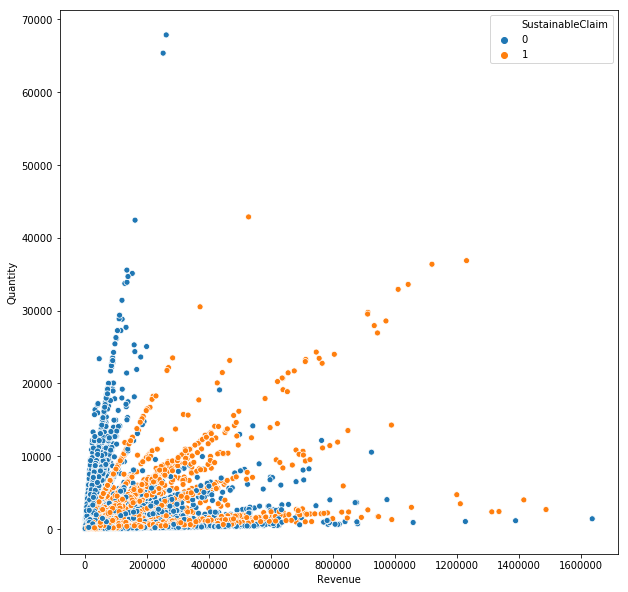

In [0]:
# Revenue Vs Quantity and Sustainability Claim
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'Revenue', y = 'Quantity', hue='SustainableClaim',  data= susitemdf)
plt.show()


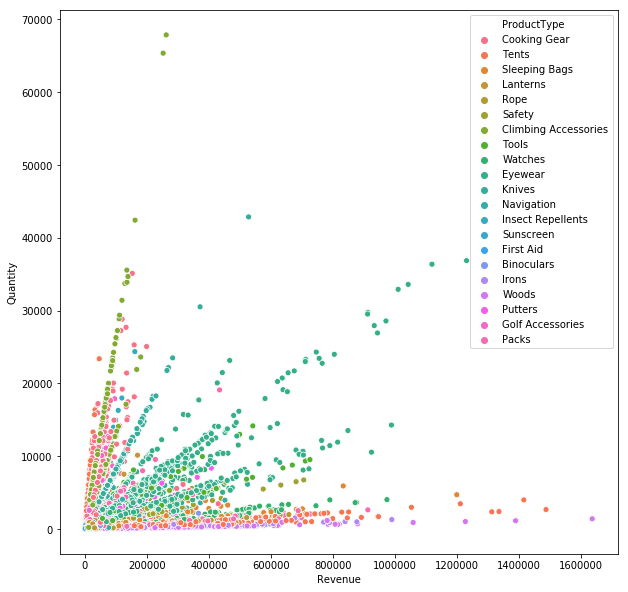

In [0]:
# Revenue vs Quantity and Product Type
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'Revenue', y = 'Quantity', hue='ProductType',  data= susitemdf)
plt.show()



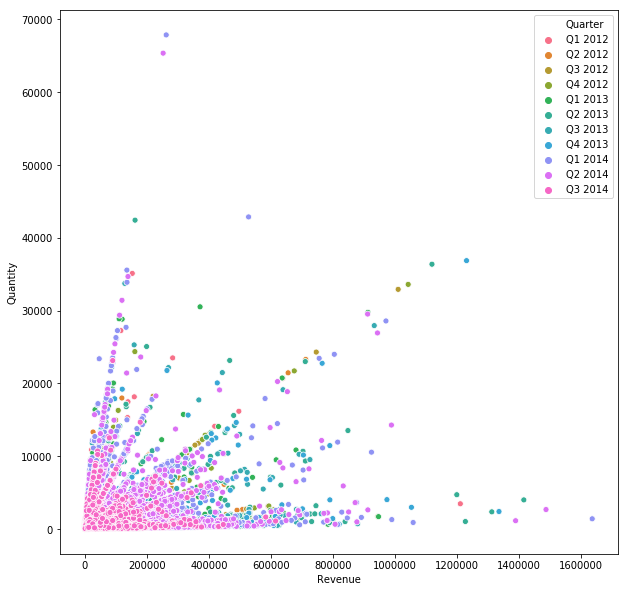

In [0]:
# Revenue vs Quantity abd Quarter
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'Revenue', y = 'Quantity', hue='Quarter',  data= susitemdf)
plt.show()



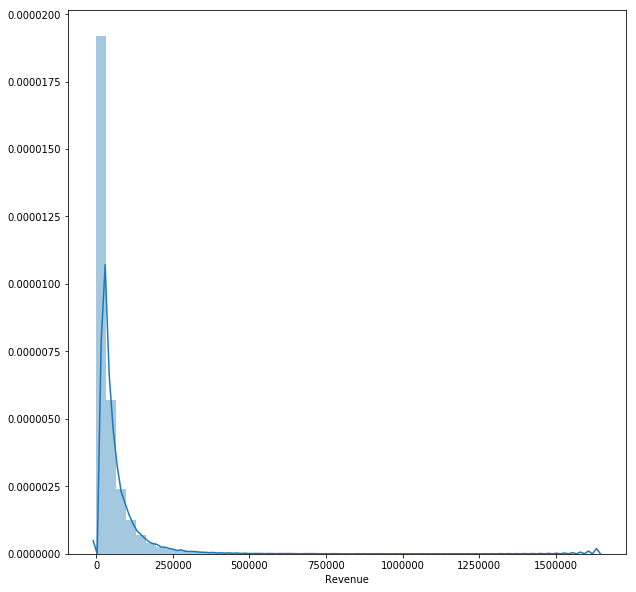

In [0]:
# Revenue Distribution
plt.figure(figsize = (10,10))
sns.distplot(susitemdf['Revenue'])
plt.show()

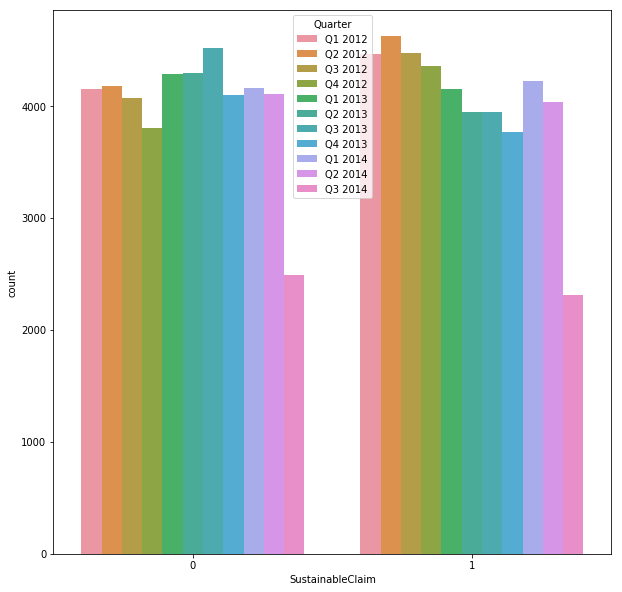

In [0]:
# sustainability claim per Quarters
plt.figure(figsize=(10,10))
sns.countplot('SustainableClaim', data=susitemdf, hue='Quarter')
plt.show()

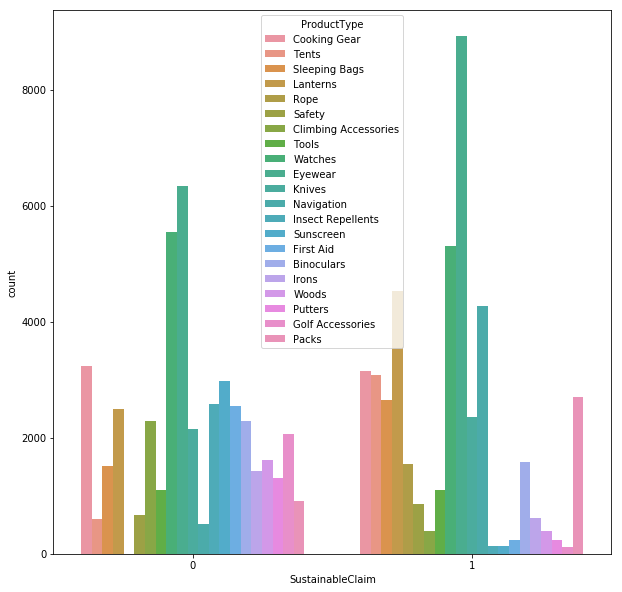

In [0]:
# sustainability ProductType

plt.figure(figsize=(10,10))
sns.countplot('SustainableClaim', data=susitemdf, hue='ProductType')
plt.show()

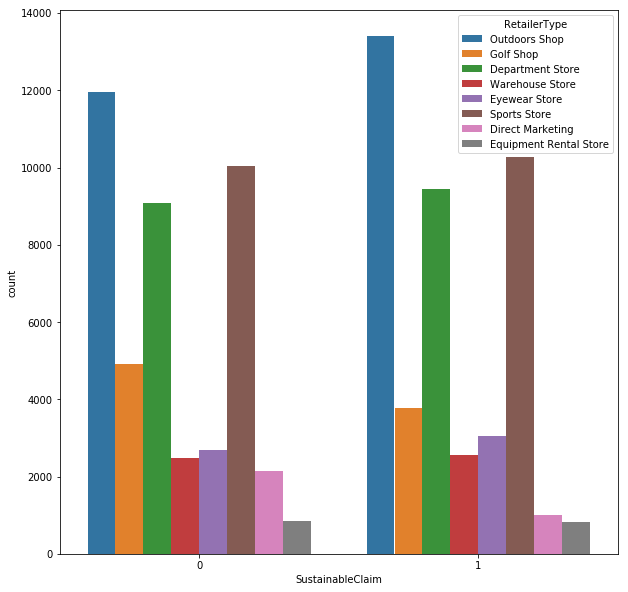

In [0]:
# sustainability RetailerType
plt.figure(figsize=(10,10))
sns.countplot('SustainableClaim', data=susitemdf, hue='RetailerType')
plt.show()

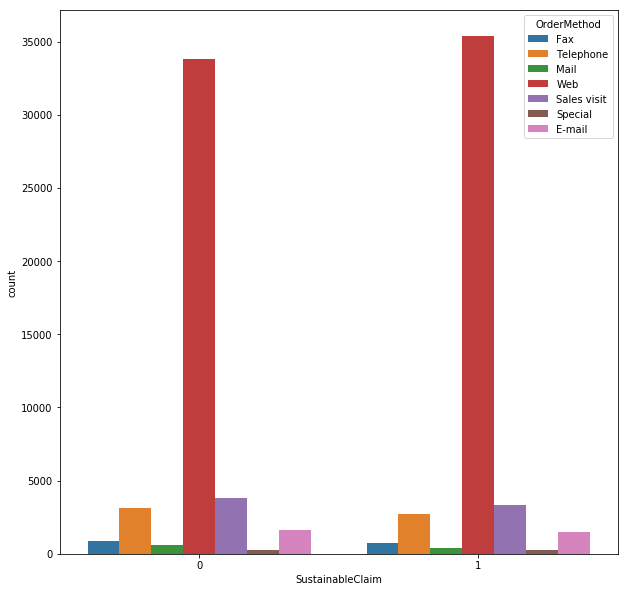

In [0]:
# sustainability OrderMethod
plt.figure(figsize=(10,10))
sns.countplot('SustainableClaim', data=susitemdf, hue='OrderMethod')
plt.show()

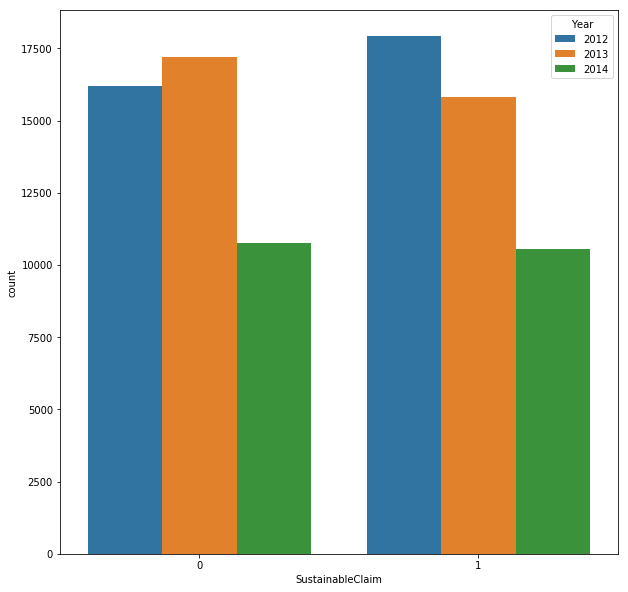

In [0]:
# sustainability and Year
plt.figure(figsize=(10,10))
sns.countplot('SustainableClaim', data=susitemdf, hue='Year')
plt.show()

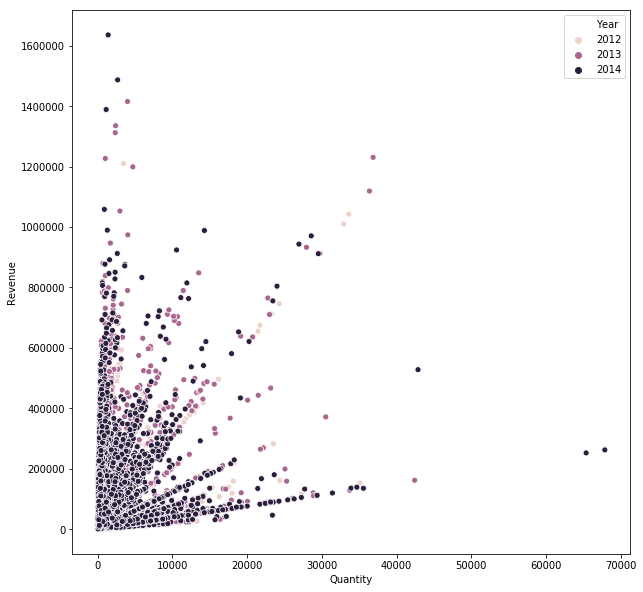

In [0]:
#
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'Quantity', y = 'Revenue', data= susitemdf, hue='Year')
plt.show()

# Classification Model: Pridicting Sustanability Claim

In [0]:
import patsy

np.random.seed(1234) # random seed for repeatability
susitemdf['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(susitemdf))

#slit to train/test using uniform to 70/30 ration
train = susitemdf[susitemdf['runiform'] >= 0.30]
test = susitemdf[susitemdf['runiform'] < 0.30]


#model string
modstr = str('SustainableClaim ~ Quantity + Revenue + SustainableMarketing ')

# target and training features
# y :target
# x: features
y,x = patsy.dmatrices(modstr, data=train, return_type='dataframe', NA_action='drop')


#logistics regression to predict sustainability claIm
model = sm.Logit(y,x).fit(method='bfgs', maxiter=100)
print(model.summary()) # print model summary


/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.693147
         Iterations: 0
         Function evaluations: 16
         Gradient evaluations: 4
                           Logit Regression Results                           
Dep. Variable:       SustainableClaim   No. Observations:                61907
Model:                          Logit   Df Residuals:                    61903
Method:                           MLE   Df Model:                            3
Date:                Thu, 25 Apr 2019   Pseudo R-squ.:              -1.075e-05
Time:                        22:25:10   Log-Likelihood:                -42911.
converged:                      False   LL-Null:                       -42910.
                                        LLR p-value:                     1.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                     0      0.015          0     

# Regression Model: Predicting Revenue

In [0]:
np.random.seed(1234)
susitemdf['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(susitemdf))
susitemdf_train = susitemdf[susitemdf['runiform'] >= 0.33]
susitemdf_test = susitemdf[susitemdf['runiform'] < 0.33]
# check training data frame
#print('\SusItems_train data frame (rows, columns): ',susitemdf_train.shape)
#print(susitemdf_train.head())
# check test data frame
#print('\SusItems_test data frame (rows, columns): ',susitemdf_test.shape)
#print(susitemdf_test.head())

# specify a simple model with bobblehead entered last
my_model = str('Revenue ~ Quantity + SustainableClaim + SustainableMarketing')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = susitemdf_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     3112.
Date:                Thu, 25 Apr 2019   Prob (F-statistic):               0.00
Time:                        22:25:42   Log-Likelihood:            -7.3728e+05
No. Observations:               59273   AIC:                         1.475e+06
Df Residuals:                   59269   BIC:                         1.475e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2.546e+04 

In [0]:
# specify a simple model with bobblehead entered last
my_model = str('Revenue ~ Quantity + RetailerType + SustainableClaim + SustainableMarketing')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = susitemdf_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     1020.
Date:                Thu, 25 Apr 2019   Prob (F-statistic):               0.00
Time:                        22:25:46   Log-Likelihood:            -7.3691e+05
No. Observations:               59273   AIC:                         1.474e+06
Df Residuals:                   59262   BIC:                         1.474e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [0]:
import statsmodels.formula.api as smf
model2 = smf.mixedlm("Revenue ~ SustainableClaim + SustainableMarketing", susitemdf_train, groups=susitemdf_train["RetailerType"])

model2f = model2.fit()

print(model2f.summary())

                   Mixed Linear Model Regression Results
Model:                 MixedLM      Dependent Variable:      Revenue        
No. Observations:      59273        Method:                  REML           
No. Groups:            8            Scale:                   4152335332.1217
Min. group size:       1144         Likelihood:              -740456.9507   
Max. group size:       16984        Converged:               Yes            
Mean group size:       7409.1                                               
----------------------------------------------------------------------------
                         Coef.     Std.Err.   z    P>|z|   [0.025    0.975] 
----------------------------------------------------------------------------
Intercept                34224.764 3967.061  8.627 0.000 26449.468 42000.061
SustainableClaim         14363.789  794.859 18.071 0.000 12805.894 15921.684
SustainableMarketing     -6621.141  831.840 -7.960 0.000 -8251.517 -4990.764
Group Var          